<a href="https://colab.research.google.com/github/robertgen/product-category-project/blob/main/notebook/product_category_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📝 Task 3 - Identificarea categoriei produselor prin denumirea lor
# 👤 Nume student: Popescu Robert - Stefan


# Pasul 1️⃣ - Initializarea datelor, fisierului csv, unde vom afisa:
## - numarul de randuri si coloane;
## - primele 5 randuri ca exemplu;
## - informatii despre dataset.

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# load dataset from GitHub
url = "https://raw.githubusercontent.com/robertgen/product-category-project/main/data/products.csv"

df = pd.read_csv(url)

# Print shape (number of rows and columns)
print("Dataset shape (rows, columns):", df.shape)

# Show first 5 rows
print("\nFirst 5 rows:")
display(df.head())

# Show column data types and non-null counts
print("\nDataset info:")
df.info()

Dataset shape (rows, columns): (35311, 8)

First 5 rows:


,product ID,Product Title,Merchant ID,Category Label,_Product Code,Number_of_Views,Merchant Rating,Listing Date
0,1,apple iphone 8 plus 64gb silver,1,Mobile Phones,QA-2276-XC,860.0,2.5,5/10/2024
1,2,apple iphone 8 plus 64 gb spacegrau,2,Mobile Phones,KA-2501-QO,3772.0,4.8,12/31/2024
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,Mobile Phones,FP-8086-IE,3092.0,3.9,11/10/2024
3,4,apple iphone 8 plus 64gb space grey,4,Mobile Phones,YI-0086-US,466.0,3.4,5/2/2022
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,Mobile Phones,NZ-3586-WP,4426.0,1.6,4/12/2023



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product ID       35311 non-null  int64  
 1   Product Title    35139 non-null  object 
 2   Merchant ID      35311 non-null  int64  
 3    Category Label  35267 non-null  object 
 4   _Product Code    35216 non-null  object 
 5   Number_of_Views  35297 non-null  float64
 6   Merchant Rating  35141 non-null  float64
 7    Listing Date    35252 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 2.2+ MB


# Pasul 2️⃣ prezentarea valorilor lipsa din fiecare coloana; cate valori lipsa are fiecare, alaturi de un grafic heatmap pentru a vizualiza mult mai usor

In [37]:

print("Missing values per column:")
print(df.isna().sum())


Missing values per column:
product ID           0
Product Title      172
Merchant ID          0
 Category Label     44
_Product Code       95
Number_of_Views     14
Merchant Rating    170
 Listing Date       59
dtype: int64


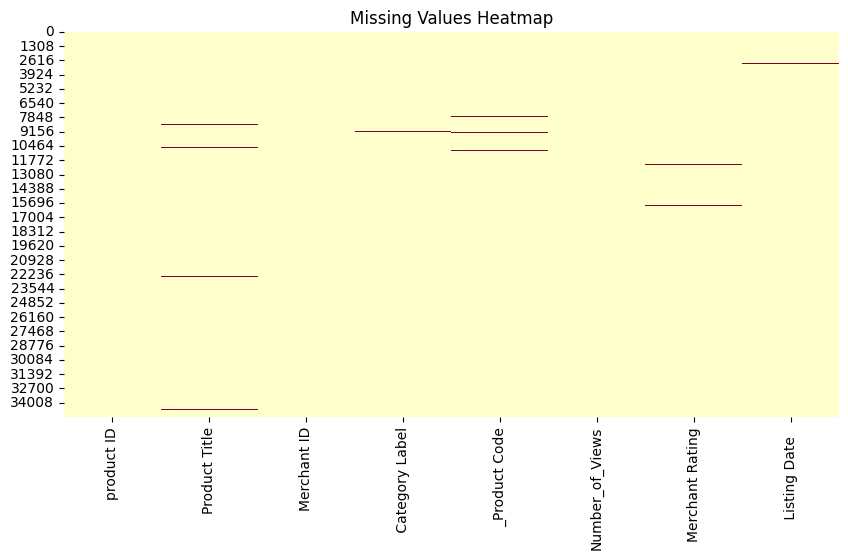

In [38]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isna(), cbar=False, cmap="YlOrRd")
plt.title("Missing Values Heatmap")
plt.show()


# 🥇 Asa cum se observa si din grafic dar si din afisajul codului, coloana cu cele mai multe valori lipsa este **Product Title**, la mica distanta fiind **Merchant Rating** si **_Product Code**.

# Pasul 3️⃣ - Schimbarea denumirilor coloanelor, deoarece multe dintre ele aveau '-' la inceput sau final, am decis ca toate sa fie cu litere mici si in loc de spatiu sa fie '-', exemplu: Product ID -> product_id + stergerea coloanelor nule

In [39]:
df.columns = df.columns.str.lower().str.replace(" ", "_").str.strip("_")
df = df.dropna()
print("\nDataset info:")
df.info()
print("\nMissing values per column:")
print(df.isna().sum())



Dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 34760 entries, 0 to 35310
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       34760 non-null  int64  
 1   product_title    34760 non-null  object 
 2   merchant_id      34760 non-null  int64  
 3   category_label   34760 non-null  object 
 4   product_code     34760 non-null  object 
 5   number_of_views  34760 non-null  float64
 6   merchant_rating  34760 non-null  float64
 7   listing_date     34760 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 2.4+ MB

Missing values per column:
product_id         0
product_title      0
merchant_id        0
category_label     0
product_code       0
number_of_views    0
merchant_rating    0
listing_date       0
dtype: int64


# Pasul 4️⃣ - eliminarea coloanelor inutile, coloane de care pur si simplu nu avem nevoie sa stim absolut nimic

In [40]:
df = df.drop(columns=['product_code', 'merchant_id'])

print("Remaining columns:")
print(df.columns.tolist())


Remaining columns:
['product_id', 'product_title', 'category_label', 'number_of_views', 'merchant_rating', 'listing_date']


# Am considerat ca aceste coloane, product_code si merchant_id nu sunt de folos noua, drept urmare, le-am eliminat.

# Pasul 5️⃣ - afisarea celor mai dese categorii, atat printr-un print cat si printr-un grafic usor interpretabil.

In [41]:
category_counts = df['category_label'].value_counts()

print("Category distribution (counts):")
print(category_counts)


Category distribution (counts):
category_label
Fridge Freezers     5424
Washing Machines    3971
Mobile Phones       3970
CPUs                3711
TVs                 3502
Fridges             3403
Dishwashers         3374
Digital Cameras     2661
Microwaves          2307
Freezers            2182
fridge               121
CPU                   81
Mobile Phone          53
Name: count, dtype: int64


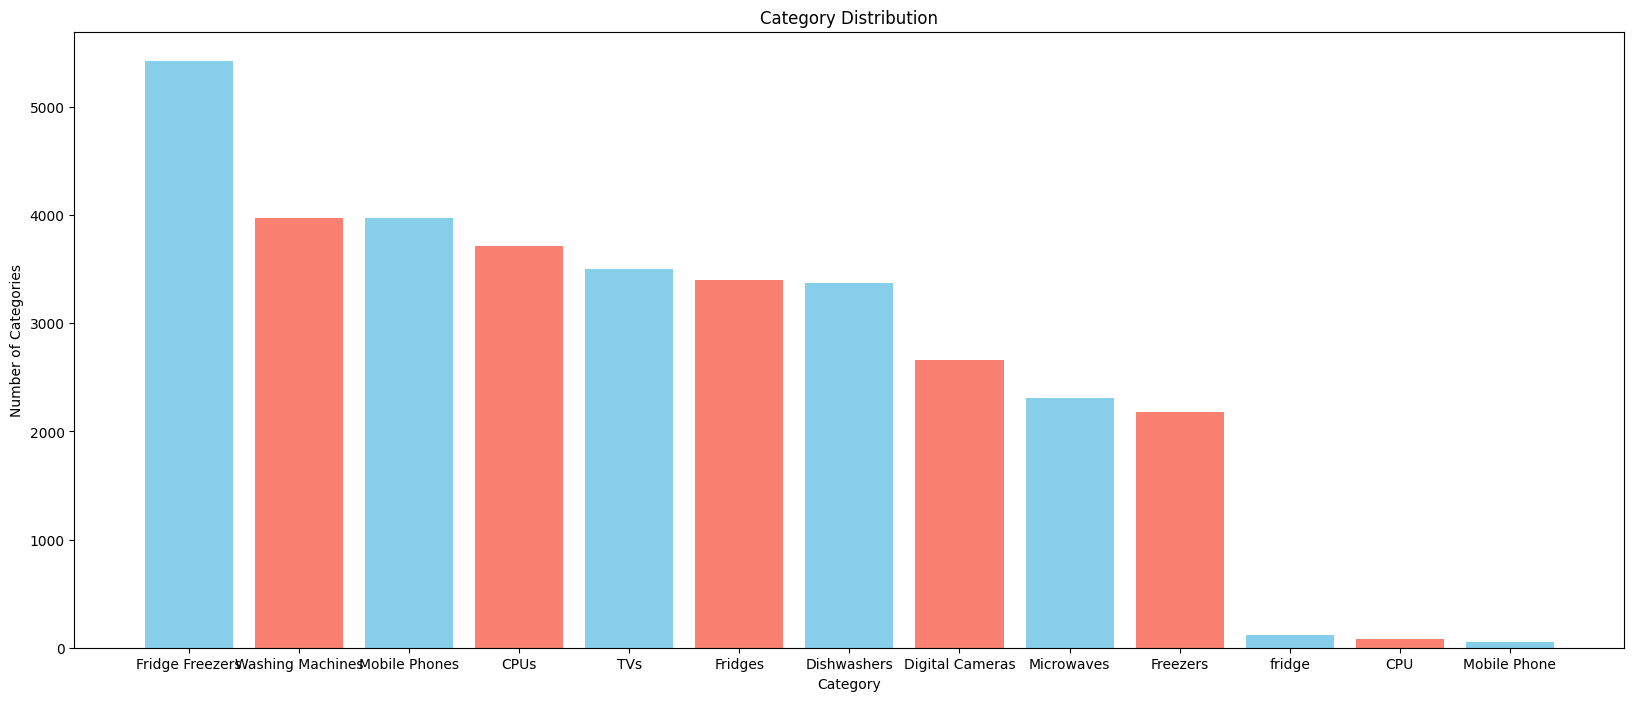

In [42]:
plt.figure(figsize=(20, 8))
plt.bar(category_counts.index, category_counts.values, color=['skyblue', 'salmon'])
plt.title("Category Distribution")
plt.xlabel("Category")
plt.ylabel("Number of Categories")
plt.show()


# Atat dupa distribuirea categoriilor prin cod dar si prin grafic, putem observa cum **Fridge Freezers** se afla detasat pe primul loc, urmat de **Washing Machines** si **Mobile Phones**.

# Pasul 6️⃣ - modificarea tipului de date al coloanelor - deoarece unele date au alt tip fata de cel esential lor

In [48]:
df['listing_date'] = pd.to_datetime(df['listing_date'], format="mixed", errors="coerce")
df['category_label'] = df['category_label'].astype('category')

print("\nDataset info after update:")
df.info()


Dataset info after update:
<class 'pandas.core.frame.DataFrame'>
Index: 34760 entries, 0 to 35310
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   product_id       34760 non-null  int64         
 1   product_title    34760 non-null  object        
 2   category_label   34760 non-null  category      
 3   number_of_views  34760 non-null  float64       
 4   merchant_rating  34760 non-null  float64       
 5   listing_date     34760 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 1.6+ MB


# Am modificat pentru coloana **listing-date** si **category_label**.

# Pasul 7️⃣ - incercam sa vedem daca merchant rating are vreo schimbare in functie de categoria produsului

Merchant rating by category label:
                   count      mean       std  min  25%  50%   75%  max
category_label                                                        
CPU                 81.0  2.791358  1.062567  1.0  1.9  2.7  3.60  4.8
CPUs              3711.0  2.988305  1.139392  1.0  2.0  3.0  4.00  5.0
Digital Cameras   2661.0  2.984592  1.174210  1.0  1.9  3.0  4.00  5.0
Dishwashers       3374.0  3.049200  1.147391  1.0  2.1  3.1  4.00  5.0
Freezers          2182.0  2.985151  1.137179  1.0  2.0  3.0  3.90  5.0
Fridge Freezers   5424.0  2.974650  1.151881  1.0  2.0  3.0  4.00  5.0
Fridges           3403.0  3.005760  1.137998  1.0  2.0  3.0  3.95  5.0
Microwaves        2307.0  2.997703  1.160240  1.0  2.0  3.0  4.00  5.0
Mobile Phone        53.0  2.847170  1.137914  1.0  2.0  2.9  3.90  5.0
Mobile Phones     3970.0  2.993753  1.161311  1.0  2.0  3.0  4.00  5.0
TVs               3502.0  2.975186  1.150107  1.0  2.0  2.9  4.00  5.0
Washing Machines  3971.0  3.044674  1.1587

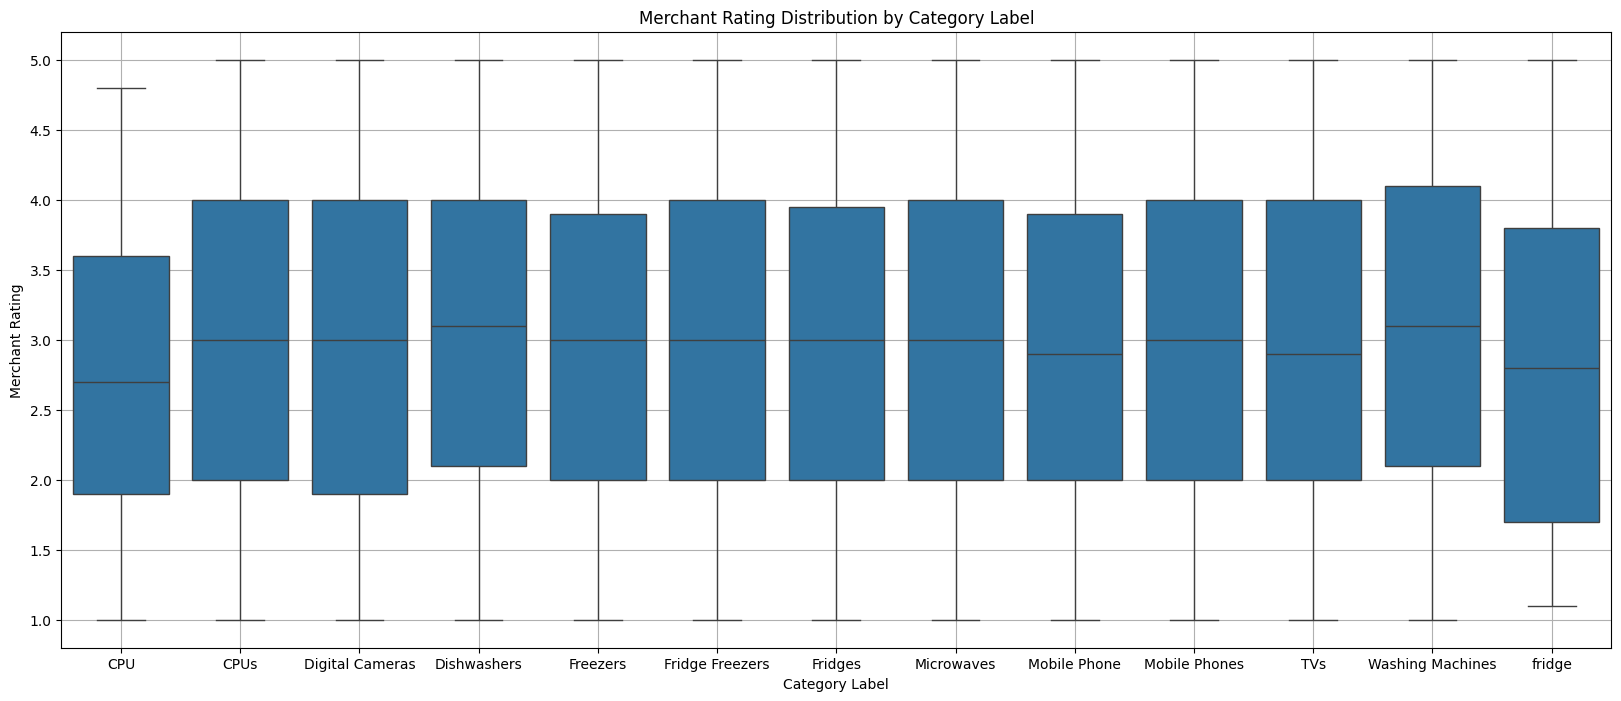

In [51]:

print("Merchant rating by category label:")
print(df.groupby('category_label', observed=False)['merchant_rating'].describe())
print(f"\n")
# Boxplot of prices by sentiment
plt.figure(figsize=(20, 8))
sns.boxplot(data=df, x='category_label', y='merchant_rating')
plt.title("Merchant Rating Distribution by Category Label")
plt.xlabel("Category Label")
plt.ylabel("Merchant Rating")
plt.grid(True)
plt.show()

# Toate ratingurile sunt asemanatoare, ceea ce rezulta clar si simplu, nu influenteaza cu nimic.